# admission predict

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("D:\\tala\\data science projects\\scores\\Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
data=data.drop(["Serial No."] , axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

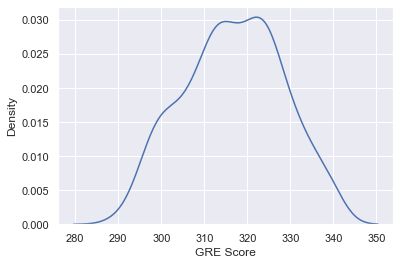

In [6]:
sns.kdeplot(data["GRE Score"])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

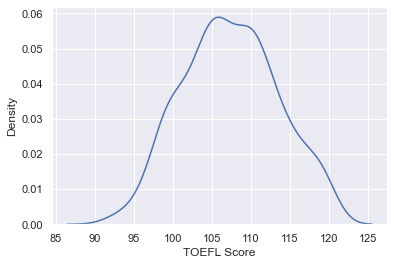

In [7]:
sns.kdeplot(data["TOEFL Score"])

In [8]:
data["University Rating"].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [9]:
uni_rating_dummy=pd.get_dummies(data["University Rating"])
uni_rating_dummy

,1,2,3,4,5
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
395,0,0,1,0,0
396,0,0,1,0,0
397,0,0,0,1,0
398,0,0,1,0,0


In [10]:
df=pd.concat([data,uni_rating_dummy] , axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,1,2,3,4,5
0,337,118,4,4.5,4.5,9.65,1,0.92,0,0,0,1,0
1,324,107,4,4.0,4.5,8.87,1,0.76,0,0,0,1,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0,0,1,0,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0,0,1,0,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0,1,0,0,0


In [11]:
df=df.drop(["University Rating"] , axis=1)
df.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,1,2,3,4,5
0,337,118,4.5,4.5,9.65,1,0.92,0,0,0,1,0
1,324,107,4.0,4.5,8.87,1,0.76,0,0,0,1,0
2,316,104,3.0,3.5,8.00,1,0.72,0,0,1,0,0
3,322,110,3.5,2.5,8.67,1,0.80,0,0,1,0,0
4,314,103,2.0,3.0,8.21,0,0.65,0,1,0,0,0


<AxesSubplot:xlabel='SOP', ylabel='Density'>

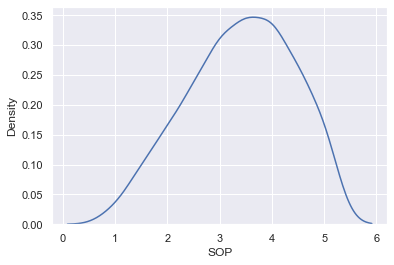

In [12]:
sns.kdeplot(df["SOP"])

<AxesSubplot:xlabel='LOR ', ylabel='Density'>

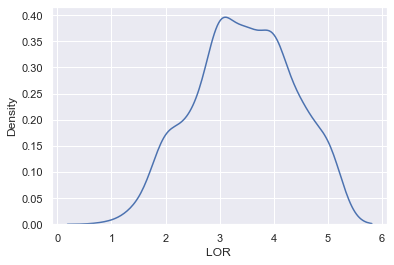

In [13]:
sns.kdeplot(df["LOR "])

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

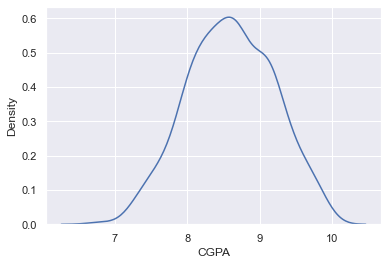

In [14]:
sns.kdeplot(df["CGPA"])

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

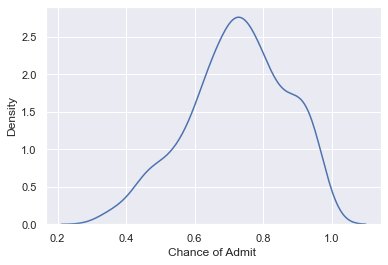

In [15]:
sns.kdeplot(df["Chance of Admit "])

In [16]:
df.columns.values

array(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit ', 1, 2, 3, 4, 5], dtype=object)

In [17]:
new_name=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit ', "rate1" , "rate2" , "rate3" , "rate4" ,"rate5"]

In [18]:
df.columns=new_name

In [19]:
df.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,rate1,rate2,rate3,rate4,rate5
0,337,118,4.5,4.5,9.65,1,0.92,0,0,0,1,0
1,324,107,4.0,4.5,8.87,1,0.76,0,0,0,1,0
2,316,104,3.0,3.5,8.00,1,0.72,0,0,1,0,0
3,322,110,3.5,2.5,8.67,1,0.80,0,0,1,0,0
4,314,103,2.0,3.0,8.21,0,0.65,0,1,0,0,0


In [20]:
reorder_columns=["rate1", "rate2","rate3","rate4","rate5",'GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit ']

In [21]:
df=df[reorder_columns]
df.head()

,rate1,rate2,rate3,rate4,rate5,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,0,0,0,1,0,337,118,4.5,4.5,9.65,1,0.92
1,0,0,0,1,0,324,107,4.0,4.5,8.87,1,0.76
2,0,0,1,0,0,316,104,3.0,3.5,8.00,1,0.72
3,0,0,1,0,0,322,110,3.5,2.5,8.67,1,0.80
4,0,1,0,0,0,314,103,2.0,3.0,8.21,0,0.65


In [24]:
df_modified=df.copy()

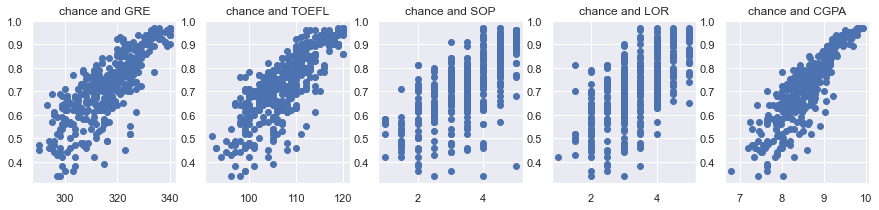

In [29]:
fig , (ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,sharey=False ,figsize=(15,3))# 5row and 1 columns

ax1.scatter(df_modified["GRE Score"],df_modified["Chance of Admit "])
ax1.set_title("chance and GRE")

ax2.scatter(df_modified["TOEFL Score"],df_modified["Chance of Admit "])
ax2.set_title("chance and TOEFL")

ax3.scatter(df_modified["SOP"],df_modified["Chance of Admit "])
ax3.set_title("chance and SOP")

ax4.scatter(df_modified["LOR "],df_modified["Chance of Admit "])
ax4.set_title("chance and LOR")

ax5.scatter(df_modified["CGPA"],df_modified["Chance of Admit "])
ax5.set_title("chance and CGPA")

plt.show()